In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('gurgaon_properties_post_feature_selection.csv')

In [3]:
df.head()

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category,price
0,0,36,3.0,2.0,2,1,850.0,0.0,0.0,0.0,1,1,0.82
1,0,95,2.0,2.0,2,1,1226.0,1.0,0.0,0.0,1,2,0.95
2,0,103,2.0,2.0,1,1,1000.0,0.0,0.0,0.0,1,0,0.32
3,0,99,3.0,4.0,4,3,1615.0,1.0,0.0,1.0,0,2,1.60
4,0,5,2.0,2.0,1,3,582.0,0.0,1.0,0.0,0,2,0.48


In [4]:
# one hot encode -> sector, balcony, agePossession, furnishing type, luxury category, floor category

In [5]:
X = df.drop(columns=['price'])
y = df['price']

In [6]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingClassifier

In [7]:
columns_to_encode = ['sector', 'balcony', 'agePossession', 'furnishing_type', 'luxury_category', 'floor_category']

C:\Users\RISHABH AGRAWAL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\RISHABH AGRAWAL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

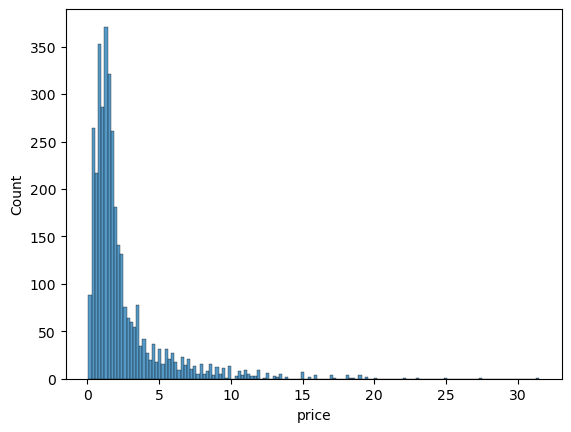

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(y) # as our output is right skewed we will convert this distribution to normal by taking log

In [9]:
# Applying the log1p transformation to the target variable
y_transformed = np.log1p(y)

C:\Users\RISHABH AGRAWAL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\RISHABH AGRAWAL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

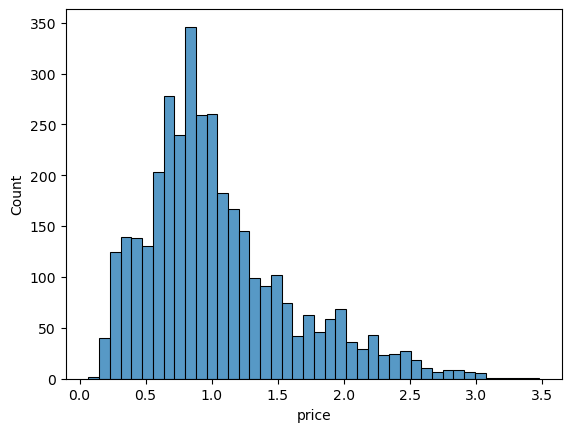

In [10]:
sns.histplot(y_transformed)

In [11]:
# Creating a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['property_type', 'bedRoom', 'bathroom', 'built_up_area', 'servant room', 'store room']),
        ('cat', OneHotEncoder(drop='first'), columns_to_encode)
    ], 
    remainder='passthrough'
)

In [12]:
# Creating a pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', SVR(kernel='rbf'))
])

In [13]:
# K-fold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(pipeline, X, y_transformed, cv=kfold, scoring='r2')

In [14]:
scores.mean()

0.8845360715052786

In [15]:
scores.std()

0.014784881452420021

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y_transformed,test_size=0.2,random_state=42)

In [17]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['property_type', 'bedRoom',
                                                   'bathroom', 'built_up_area',
                                                   'servant room',
                                                   'store room']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['sector', 'balcony',
                                                   'agePossession',
                                                   'furnishing_type',
                                                   'luxury_category',
                                                   'floor_category'])])),
                ('regressor', SVR())])

In [18]:
y_pred = pipeline.predict(X_test)

In [19]:
y_pred = np.expm1(y_pred)

In [20]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(np.expm1(y_test),y_pred)

0.5324591082613233